In [1]:
import OOPAO
import tomoAO


import matplotlib.pyplot as plt
import numpy as np

from scipy.io import savemat, loadmat





     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
ao_mode = "MLAO"

config_dir = "./"
config_file = "config_keck.ini"

config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)


## Asterism

In [3]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]

lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  8.89   
Flux [photon/m²/s]       | 2.5e+06 
Coordinates [arcsec,deg] | [7.6,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              |  90.00  
Altitude [m]             |   inf   
Magnitude                |  8.89   
Flux [photon/m²/s]       | 2.5e+06 
Coordinates [arcsec,deg] | [7.6,90]
-----------------------------------


-------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  7.60   
Azimuth [°]              | 180.00  
Altitude [m]             |   inf   
Magnitude                |  8.89   
Flux [photon/m²/s]     

## Telescope 


------------ Telescope -------------
Diameter [m]             |  13.50   
Resolution [px]          |   288    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    24    
Pixels in pupil          |  61552   
Field of view [arcsec]   |  20.00   
------------------------------------

OOPAO Warning: 
A new pupil is now considered, its reflectivity is considered to be uniform. Assign the proper reflectivity map to tel.pupilReflectivity if required.


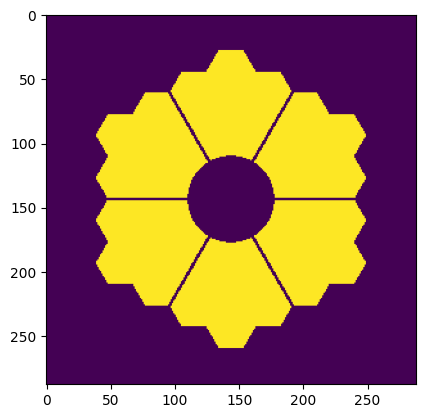

In [4]:
from OOPAO.Telescope import Telescope


sensing_wavelength  = lgsAst.src[0].wavelength           # sensing wavelength of the WFS, read from the ngs object
n_subaperture       = config_vars["nSubaperture"]        # number of subaperture across the diameter
diameter            = config_vars["diameter"]            # diameter of the support of the phase screens in [m]
resolution          = config_vars["resolution"]          # resolution of the phase screens in pixels
obs_ratio           = config_vars["centralObstruction"]  # central obstruction in fraction of the telescope diameter
sampling_time       = config_vars["samplingTime"]        # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"] # field of view of the telescope (arcsec)


tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)


pupil_data = loadmat(config_vars["tel_pupil"])
pupil = pupil_data['pup'] 

tel.pupil = pupil

plt.imshow(tel.pupil)

## Atmosphere

In [5]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 src            = lgsAst,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)

Creation of layer1/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.05197882652282715 s
ZZt.. : 17.01281428337097 s
ZXt.. : 1.3927280902862549 s
XXt.. : 0.7040696144104004 s
Done!
Creation of layer2/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.06027817726135254 s
ZZt.. : 15.580695867538452 s
ZXt.. : 1.4162015914916992 s
XXt.. : 0.7148916721343994 s
Done!
Creation of layer3/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.058556556701660156 s
ZZt.. : 6.807048082351685 s
ZXt.. : 1.3667807579040527 s
XXt.. : 0.6713483333587646 s
Done!
Creation of layer4/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.062252044677734375 s
ZZt.. : 7.02717399597168 s
ZXt.. : 1.4041376113891602 s
XXt.. : 0.696948766708374 s
Done!
Creation of layer5/7 ...
-> Computing the initial phase screen...
initial phase screen : 0.0626983642578125 s
ZZt.. : 7.400385618209839 s
ZXt.. : 1.450148105621338 s
XXt.. : 0.71495032310

In [6]:
lgsAst**atm*tel


--------------------------------- Asterism ---------------------------------
 Source | Wavelength | Zenith | Azimuth | Altitude | Magnitude |   Flux    |
        |    [m]     |[arcsec]|   [°]   |   [m]    |           | [ph/m²/s] |
  1-NGS |  5.9e-07   |  7.60  |  0.00   |   inf    |   8.89    |  2.5e+06  |
  2-NGS |  5.9e-07   |  7.60  |  90.00  |   inf    |   8.89    |  2.5e+06  |
  3-NGS |  5.9e-07   |  7.60  | 180.00  |   inf    |   8.89    |  2.5e+06  |
  4-NGS |  5.9e-07   |  7.60  | 270.00  |   inf    |   8.89    |  2.5e+06  |
----------------------------------------------------------------------------

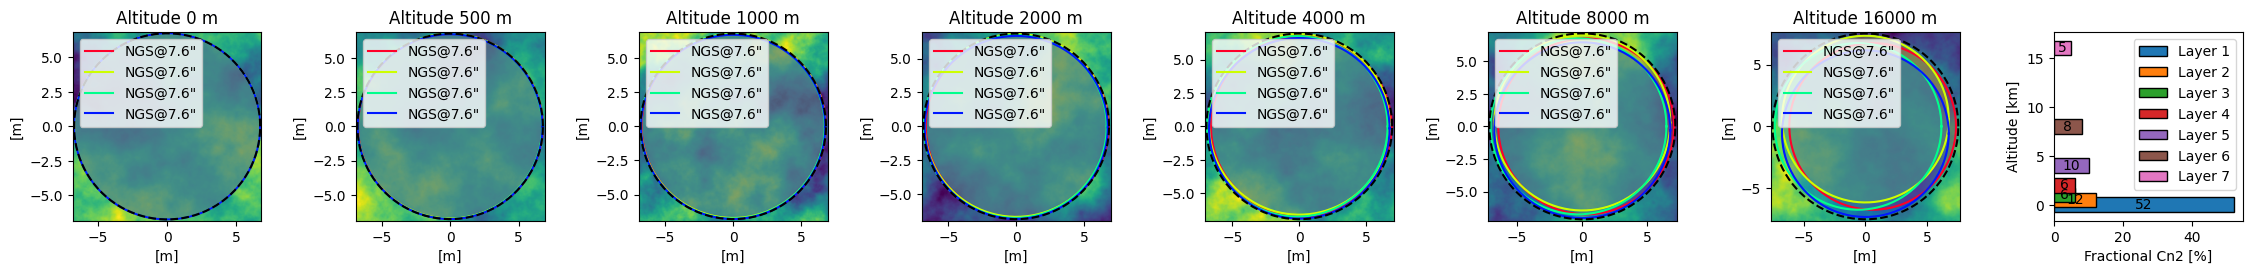

In [7]:
atm.display_atm_layers()

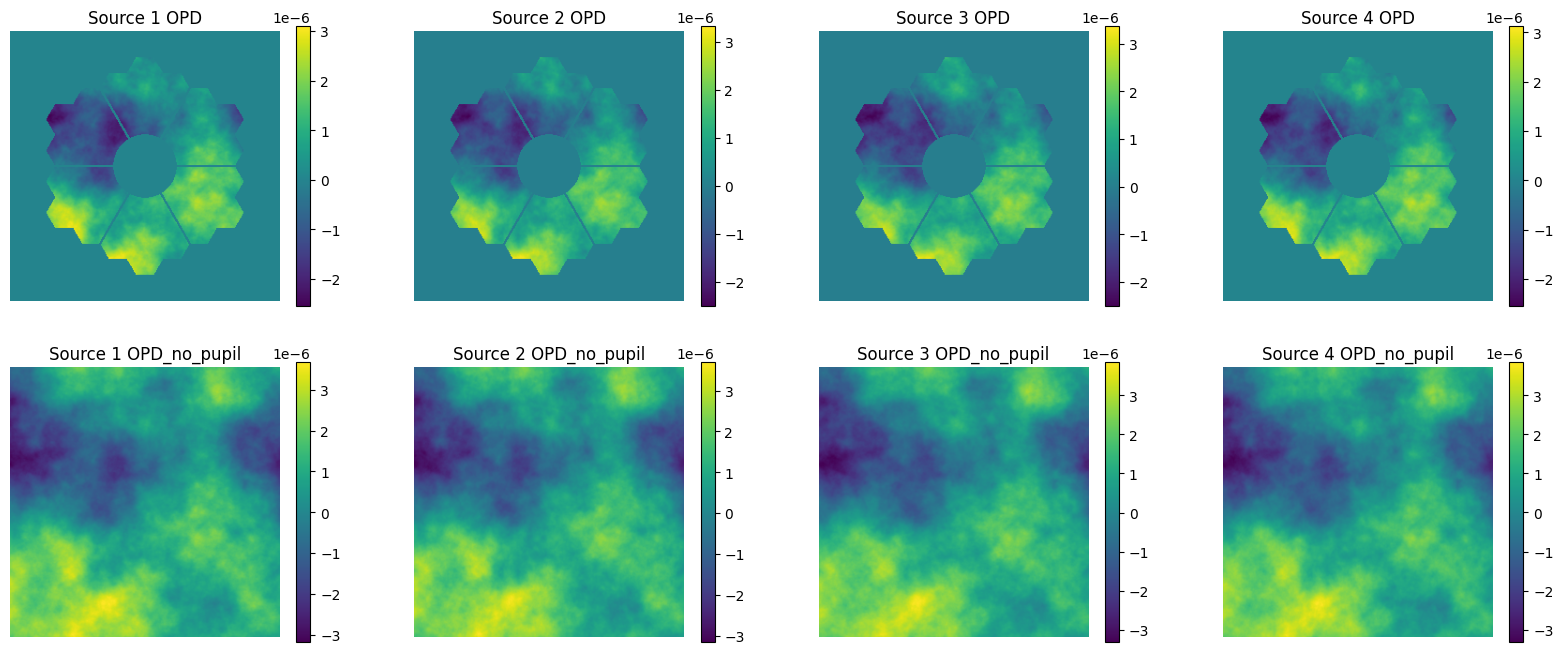

In [8]:
fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i+1} OPD')
    fig.colorbar(im, ax=axes[0, i])

    im = axes[1, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Source {i+1} OPD_no_pupil')
    fig.colorbar(im, ax=axes[1, i])


## ShackHartmann WFS

In [9]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.5,
                      is_geometric       = False,
                      shannon_sampling   = True,
                      threshold_cog      = 0.01)


shwfs_geom = ShackHartmann(telescope     = tel,
                    nSubap             = n_subaperture,
                    lightRatio         = 0.5,
                    is_geometric       = True,
                    shannon_sampling   = True,
                    threshold_cog      = 0.01)



No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   288   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   24    
Subaperture Pitch [m]    |  0.56   
Subaperture FoV [arcsec] |  1.30   
Pixel Scale [arcsec]     |  0.108  
Valid Subapertures       |   456   
Spot Sampling [pix]      |  2.00   
Geometric WFS            |  False  
----------------------

In [10]:
unfiltered_subap_mask = np.loadtxt(config_vars["unfiltered_subap_mask"], dtype=bool, delimiter=",")
filtered_subap_mask = np.loadtxt(config_vars["filtered_subap_mask"], dtype=bool, delimiter=",")

shwfs.valid_subapertures = unfiltered_subap_mask.copy()
shwfs.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
shwfs.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()
shwfs.nValidSubaperture = np.count_nonzero(shwfs.valid_subapertures)

shwfs.filtered_subap_mask = filtered_subap_mask.copy()
shwfs.unfiltered_subap_mask = unfiltered_subap_mask.copy()

shwfs_geom.valid_subapertures = unfiltered_subap_mask.copy()
shwfs_geom.valid_slopes_maps[:24, :] = unfiltered_subap_mask.copy()
shwfs_geom.valid_slopes_maps[24:, :] = unfiltered_subap_mask.copy()
shwfs_geom.nValidSubaperture = np.count_nonzero(shwfs_geom.valid_subapertures)

shwfs_geom.filtered_subap_mask = filtered_subap_mask.copy()
shwfs_geom.unfiltered_subap_mask = unfiltered_subap_mask.copy()


NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann
NGS(Na) ~~> atmosphere ~~> telescope ~~> shackHartmann


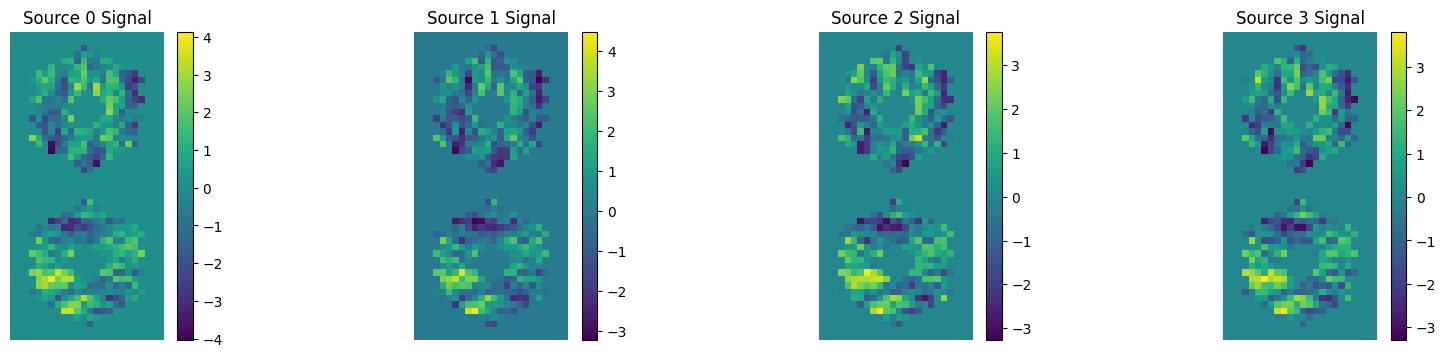

In [11]:
lgsAst**atm*tel*shwfs

lgsAst.print_optical_path()

fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


## Deformable Mirror

In [12]:
from OOPAO.DeformableMirror import DeformableMirror
from OOPAO.MisRegistration import MisRegistration


mechanical_coupling = config_vars['mechanicalCoupling']
misReg = MisRegistration(config_vars)

unfiltered_act_mask = np.loadtxt(config_vars["actuator_mask"], dtype=bool, delimiter=",")
if unfiltered_act_mask.shape[0] != config_vars['nActuator']:
    unfiltered_act_mask = np.pad(unfiltered_act_mask, pad_width=int(config_vars['nSubapExtra']/2), mode='constant', constant_values=0)


X, Y = tomoAO.tools.tomography_tools.meshgrid(config_vars['nActuator'], tel.D, offset_x=0.0, offset_y=0.0, stretch_x=1, stretch_y=1)
coordinates = np.array([X[unfiltered_act_mask], Y[unfiltered_act_mask]]).T

dm = DeformableMirror(telescope=tel,
                            nSubap=config_vars['nSubaperture'],
                            mechCoupling=config_vars['mechanicalCoupling'],
                            misReg=misReg,
                            coordinates=coordinates,
                            pitch=tel.D / (config_vars['nActuator'] - 1))


dm.unfiltered_act_mask = unfiltered_act_mask.copy()


Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   349   
M4                       |  False  
Pitch [m]                |  0.56   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------



### AO System (tomoAO)


In [13]:
aoSys = tomoAO.Simulation.AOSystem(config_vars, tel=tel, lgsAst=lgsAst, dm=dm, atm=atm, wfs=shwfs)


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   349   
M4                       |  False  
Pitch [m]                |  0.56   
Mechnical coupling [%]   |   15    
== Misregistra

### Tomographic Reconstructor (tomoAO)


In [14]:
from tomoAO.Reconstruction.reconClassType import tomoReconstructor

rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2, 
                        order=config_vars["order"], indexation=config_vars["indexation"])


atm.r0 = 0.16


Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Building Gamma
Took 0.05271196365356445 seconds to build Gamma
Building the covariance matrices
Took 38.90304112434387 seconds to build the covariance matrices
Building the reconstructor
Took 3.2000019550323486 seconds to build the reconstructor
Updating the Atmosphere covariance matrices...


In [15]:
reconstructor = rec.reconstructor.copy()

### Loop

-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |  1152   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



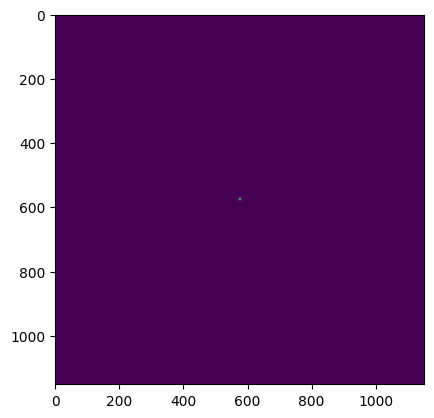


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



  1%|          | 3/349 [00:00<00:17, 20.30it/s]

updating the flux of the SHWFS object


100%|██████████| 349/349 [00:10<00:00, 34.72it/s]

Running closed loop with diffractive sensor


In [ ]:
from OOPAO.Detector import Detector
SciSrc_cam = Detector(tel.resolution*4)
SciSrc_cam.psf_sampling = 4
SciSrc_cam.integrationTime = tel.samplingTime*1


# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

dm.coefs = 0      # initialize DM commands

# initialize DM commands
SciSrc**atm*tel*dm*SciSrc_cam


nLoop = config_vars["nLoop"]

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
gainCL                  = config_vars["gainCL"]

atm.generateNewPhaseScreen(10)
# Save reference frame 
SciSrc**tel*dm*SciSrc_cam
plt.imshow(SciSrc_cam.frame)
plt.show()
SciSrc_cam.reference_frame = SciSrc_cam.frame.copy()



from tqdm import tqdm

if config_vars["loop_mode"] == 'closed':
    calib_src = Source('Na', 0)

    calib_src**atm
    dm_eye = np.eye(dm.nValidAct)
    imat = np.zeros((shwfs_geom.nValidSubaperture*2, dm.nValidAct)) 
    for i_act in tqdm(range(dm.nValidAct)):
        dm.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
        calib_src**tel*dm*shwfs_geom
        
        wfsSignal = np.hstack(shwfs_geom.signal)
        
        if rec.indexation == "xyxy":
            wfsSignal_xyxy = np.zeros(wfsSignal.shape)
            wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
            wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
            wfsSignal = wfsSignal_xyxy.copy()
            
        
        imat[:, i_act] = wfsSignal

    imat = imat*2*np.pi/calib_src.wavelength    
    imat = np.vstack([imat]*n_lgs)


print(f"Running {config_vars['loop_mode']} loop with {'geometric' if config_vars['wfs_type'] == 'g' else 'diffractive'} sensor")


In [17]:


for i in range(nLoop):

    atm.update()
    SciSrc**atm*tel

    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


    if config_vars["loop_mode"] == 'open':
        lgsAst**atm*tel*shwfs_geom*dm
        wfsSignal = np.hstack(shwfs_geom.signal)
        
    elif config_vars["loop_mode"] == 'closed':

        if config_vars["wfs_type"] == 'g':
            lgsAst**atm*tel*dm*shwfs_geom
            wfsSignal = np.hstack(shwfs_geom.signal)

        elif config_vars["wfs_type"] == 'd':
            lgsAst**atm*tel*dm*shwfs
            wfsSignal = np.hstack(shwfs.signal)
    
    

    if rec.indexation == "xyxy":

        wfsSignal_xyxy = np.zeros(wfsSignal.shape)
        wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
        wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
        wfsSignal = wfsSignal_xyxy.copy()


    if config_vars["loop_mode"] == 'closed':
        wfsSignal = wfsSignal-imat@dm.coefs

    SciSrc**atm*tel*dm*SciSrc_cam

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9

    
    print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')


Loop0/50 AO residual: 1118.2560562099143 nm
Loop1/50 AO residual: 270.7120715297031 nm
Loop2/50 AO residual: 152.6175007512297 nm
Loop3/50 AO residual: 157.10814905092107 nm
Loop4/50 AO residual: 156.1944288875363 nm
Loop5/50 AO residual: 150.06805824621338 nm
Loop6/50 AO residual: 145.21083697327657 nm
Loop7/50 AO residual: 143.50359988370522 nm
Loop8/50 AO residual: 145.27244387796247 nm
Loop9/50 AO residual: 144.18815933398224 nm
Loop10/50 AO residual: 142.97510984810538 nm
Loop11/50 AO residual: 140.04078446522675 nm
Loop12/50 AO residual: 138.44296935255156 nm
Loop13/50 AO residual: 137.68357172032879 nm
Loop14/50 AO residual: 135.59152512493284 nm
Loop15/50 AO residual: 135.94952005755556 nm
Loop16/50 AO residual: 139.2377311934735 nm
Loop17/50 AO residual: 146.5852624977414 nm
Loop18/50 AO residual: 149.99093351418196 nm
Loop19/50 AO residual: 147.86464066077264 nm
Loop20/50 AO residual: 146.11915033593493 nm
Loop21/50 AO residual: 146.11459866764983 nm
Loop22/50 AO residual: 14

## Results

In [20]:
print(f"Mean AO res {round(np.mean(residual[10:]), 2)} nm")
print(f"Mean Marechal SR: {round(np.mean(SR[10:])*100, 2)}%")
print(f"max(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}%")


Mean AO res 150.02 nm
Mean Marechal SR: 72.25%
max(i_ao)/max(i_dl) SR: 76.43%


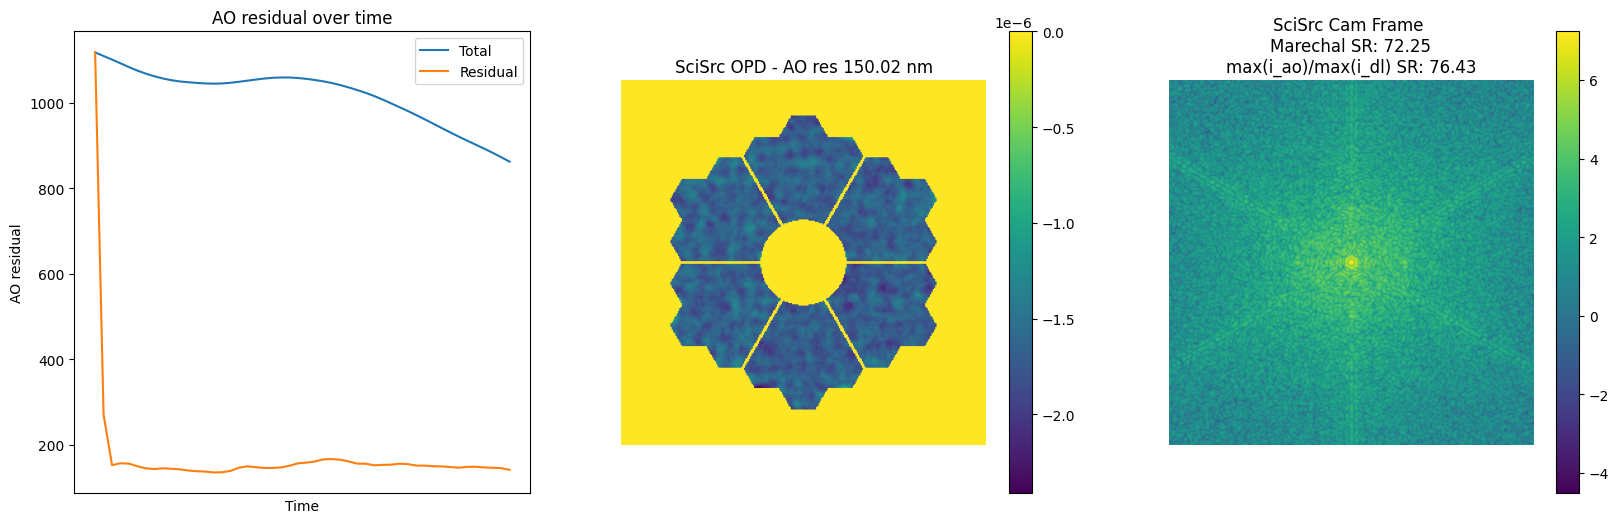

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].plot(total, label="Total")
axes[0].plot(residual, label="Residual")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("AO residual")
axes[0].set_title("AO residual over time")
axes[0].legend()
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


im = axes[1].imshow(SciSrc.OPD)
axes[1].axis('off')
axes[1].set_title(f"SciSrc OPD - AO res {round(np.mean(residual[10:]), 2)} nm")
fig.colorbar(im, ax=axes[1])


# set back the reflectivity 1
tel.pupilReflectivity = tel.pupil.astype(float)

SciSrc**atm*tel*dm 

# compute PSF method
zeroPaddingFactor = 6
tel.computePSF(zeroPaddingFactor=zeroPaddingFactor, detector=SciSrc_cam)

# get current pixel scale
size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
N                 = 250
normalized_PSF    = tel.PSF[N:-N,N:-N]# crop to zoom on the center
fov               = normalized_PSF.shape[0]*size_pixel_arcsec # get the corresponding fov


im = axes[2].imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
axes[2].axis('off')
axes[2].set_title(f"SciSrc Cam Frame \nMarechal SR: {round(np.mean(SR[10:])*100, 2)}\nmax(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}")
fig.colorbar(im, ax=axes[2])

